In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [4]:
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [7]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [155]:
input_standard = pd.read_csv('notebook8-LDAFeature-thisstandard.csv')

In [157]:
input_standard.drop('Unnamed: 0', axis=1, inplace=True)
# input_standard.drop('content', axis=1,inplace=True)
# input_standard.drop('share', axis=1, inplace=True)
# input_standard.drop('like', axis=1, inplace=True)
# input_standard.drop('comment', axis=1, inplace=True)
# input_standard.drop('time', axis=1, inplace=True)
# input_standard.drop('Unnamed: 0.1', axis=1, inplace=True)


In [158]:
input_standard.head()

,headline,date,view,category,tag,DOW,token,numToken,numChar,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,is_Now & Next 2018,is_Business,is_Living,is_Special Report,is_Special Story,is_Now & Next 2019,is_ณัฐพงศ์ ดวงแก้ว,is_Sport,is_Harry And Meghan,is_สโรจ เลาหศิริ,is_LGBTQ,is_World Cup 2018 Features,is_Wellness,is_Grooming,is_Guest,is_King Rama 9,is_News,is_Science,is_ธิดากานต์ รุจิพัฒนกุล,is_Thailand,is_Editor’s Desk,is_โสภณ ศุภมั่งมี,is_Fashion,is_World Cup 2018 Analysis,is_Eat & Drink,is_Beauty,is_Lifestyle,is_Politics,is_nan,is_ศิโรตม์ คล้ามไพบูลย์,is_TV & Entertainment,is_WORLD CUP 2018,is_World,is_Art & Design,is_Environment,is_China,is_Tech,is_โตมร ศุขปรีชา,is_POP,is_King Rama9 2018,is_Oscars 2018,is_เคท ครั้งพิบูลย์,is_Book,is_Travel,is_Film,is_Sex & Relationships,is_เมธา พันธุ์วราทร,is_World Cup 2018 Fixtures,is_Music,is_On this day,is_Entertainment,is_Event,is_อาจวรงค์ จันทมาศ,is_Culture,tag_pop_sum,tag_pop_mean,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,numTag,month,year,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
0,สุดารัตน์การันตี มิ่งขวัญไม่เสียสัจจะ เชื่อประชาชนจะบอยคอตนักการเมืองขี้โกหก,2019-04-13,368,"Thailand,Politics","พรรคเพื่อไทย,สุดารัตน์ เกยุราพันธุ์,มิ่งขวัญ แสงสุวรรณ์,พรรคเศรษฐกิจใหม่",SAT,"สุดารัตน์การันตี,มิ่งขวัญ,สัจจะ,ประชาชน,บอย,คอต,เมือง,ขี้,โกหก",9,54,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,304,76,0,0,0,0,0,0,1,0,1,0,0,0,1,0,2,0.732773,0.722237,51,12,4,9,4,2,4,4,2019,0.012544,0.510984,0.012539,0.012541,0.012539,0.012570,0.012544,0.413741
1,สโมสรฟุตบอลซาน ลอเรนโซฯ ในอาร์เจนตินา ประกาศเซ็นสัญญานักฟุตบอลอาชีพหญิงฉบับแรกของประเทศรวดเดียว 15 คน,2019-04-13,22,Sport,"Argentina,San Lorenzo de Almagro",SAT,"สโมสรฟุตบอล,ซาน ลอเรนโซฯ,อาร์เจนตินา,ประกาศ,เซ็น,สัญญา,ฟุตบอล,อาชีพ,หญิง,ฉบับ,ประเทศ,รวดเดียว,คน",13,84,7,11,0,1,0,0,0,2,0,0,0,0,0,0,0,0.846154,0.076923,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.693959,1.000000,3,3,1,4,2,2,2,4,2019,0.000000,0.000000,0.139994,0.000000,0.370802,0.444339,0.000000,0.000000
2,ภาพข่าวยอดเยี่ยมประจำวันที่ 7-13 เมษายน 2562,2019-04-13,31,"World,Thailand",ภาพข่าวยอดเยี่ยม,SAT,"ภาพ,ข่าว,ยอดเยี่ยม,ประจำ,เมษายน,2562",6,31,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0.833333,0.166667,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,81,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.792388,1.000000,0,0,0,16,16,1,1,4,2019,0.874944,0.017858,0.017858,0.017866,0.017872,0.017883,0.017860,0.017858
3,สงกรานต์สีลม สีสันความสนุก กิจกรรมดับร้อนของคนกรุงเทพฯ,2019-04-13,280,Thailand,เทศกาลสงกรานต์,SAT,"สงกรานต์,สีลม,สี,สัน,สนุก,กิจกรรม,ดับ,ร้อน,คน,กรุงเทพฯ",10,45,7,7,0,1,0,0,1,1,0,0,0,0,0,0,0,0.700000,0.100000,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,63,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.708988,0.640314,3,3,1,25,25,1,1,4,2019,0.011381,0.583157,0.011376,0.011398,0.011378,0.131729,0.228202,0.011378
4,14 April 2003 – โครงการศึกษาจีโนมของมนุษย์เสร็จสิ้น,2019-04-14,56,On this day,"พันธุกรรม,วิทยาศาสตร์",SUN,"April,2003,โครงการ,ศึกษา,จีโนม,มนุษย์",6,32,6,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0.833333,0.166667,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.689889,1.000000,2,2,1,2,1,2,2,4,2019,0.017895,0.017895,0.017895,0.874589,0.017957,0.017895,

In [159]:
input_standard['view'].describe()

count    1.016900e+04
mean     4.366047e+03
std      9.892414e+04
min      0.000000e+00
25%      3.780000e+02
50%      1.241000e+03
75%      2.612000e+03
max      8.744000e+06
Name: view, dtype: float64

In [160]:
MAXVIEW = input_standard['view'].max()
MAXVIEW

8744000

In [161]:
view_mean = input_standard['view'].describe()['mean']
view_sd = input_standard['view'].describe()['std']

In [162]:
input_standard['view'].describe()

count    1.016900e+04
mean     4.366047e+03
std      9.892414e+04
min      0.000000e+00
25%      3.780000e+02
50%      1.241000e+03
75%      2.612000e+03
max      8.744000e+06
Name: view, dtype: float64

In [163]:
len(input_standard)

10169

## Feature extraction

In [164]:
# input_standard_train, input_standard_test = train_test_split(input_standard, test_size=0.2,random_state=100)

In [165]:
# f, axarr = plt.subplots(2, figsize=(20,20))
# sns.distplot(input_standard_train['view'],ax=axarr[0])
# sns.distplot(input_standard_test['view'],ax=axarr[1])

In [166]:
view_df = pd.DataFrame(input_standard['view'])

In [167]:
view_df.shape

(10169, 1)

In [168]:
from sklearn.cluster import KMeans

In [177]:
k=2

In [178]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(view_df)
kmeans.cluster_centers_

array([[3.05324442e+03],
       [6.67800000e+06]])

In [179]:
input_standard['class'] = 0

In [180]:
for i in range(9):
    split_class = np.argmax(input_standard['class'].value_counts())
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pd.DataFrame(input_standard[input_standard['class']==split_class]['view']))
#     print(kmeans.cluster_centers_)
#     print(input_standard_train['class'].value_counts())
    if len(np.argwhere(kmeans.labels_ == 0)) < len(np.argwhere(kmeans.labels_ == 1)):
        tmp = np.argwhere(kmeans.labels_ == 0)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 1)] = split_class
        kmeans.labels_[tmp] = 9-i
    else:
        tmp = np.argwhere(kmeans.labels_ == 1)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 0)] = split_class
        kmeans.labels_[tmp] = 9-i
    input_standard.loc[(input_standard['class'] == split_class), 'class'] = kmeans.labels_
#     print(input_standard_train['class'].value_counts())


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current 

In [181]:
print(input_standard['class'].value_counts())

4    2120
5    1926
3    1829
0    1667
2    1438
1    676 
6    416 
7    69  
8    26  
9    2   
Name: class, dtype: int64


In [182]:
input_standard.groupby('class')['view'].describe()['max']

class
0    257.0    
1    7755.0   
2    470.0    
3    1073.0   
4    2246.0   
5    4287.0   
6    28392.0  
7    113544.0 
8    443000.0 
9    8744000.0
Name: max, dtype: float64

In [183]:
input_standard = input_standard[(input_standard['class']!=6)&(input_standard['class']!=7)&(input_standard['class']!=8)&(input_standard['class']!=9)]

In [184]:
# input_standard = input_standard[(input_standard['class']!=5)]

In [185]:
# input_standard_train.loc[(input_standard_train['class'] == 5), 'class'] = 4
# input_standard_train.loc[(input_standard_train['class'] == 6), 'class'] = 4
# input_standard_train.loc[(input_standard_train['class'] == 7), 'class'] = 4

In [186]:
print(input_standard['class'].value_counts())

4    2120
5    1926
3    1829
0    1667
2    1438
1    676 
Name: class, dtype: int64


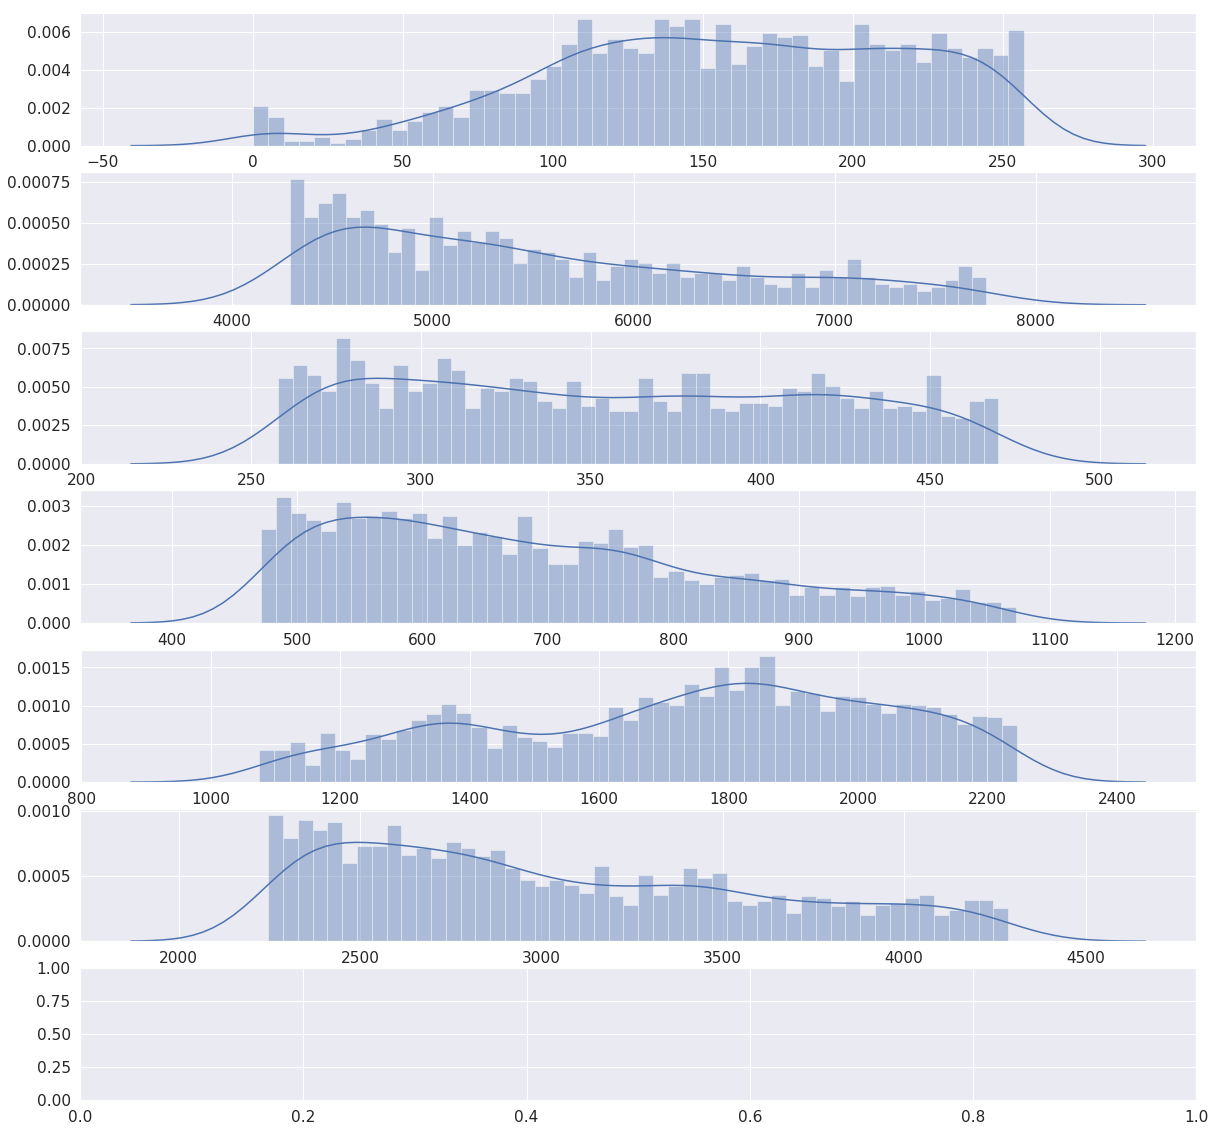

In [187]:
f, axarr = plt.subplots(7, figsize=(20,20))
for i in range(7):
#     print(i,len(input_standard_train[input_standard_train['class']==i]))
    if len(input_standard[input_standard['class']==i]) > 1:
        sns.distplot(input_standard[input_standard['class']==i]['view'],ax=axarr[i],bins=50)


In [188]:
input_standard_train, input_standard_test = train_test_split(input_standard, test_size=0.2,random_state=100)

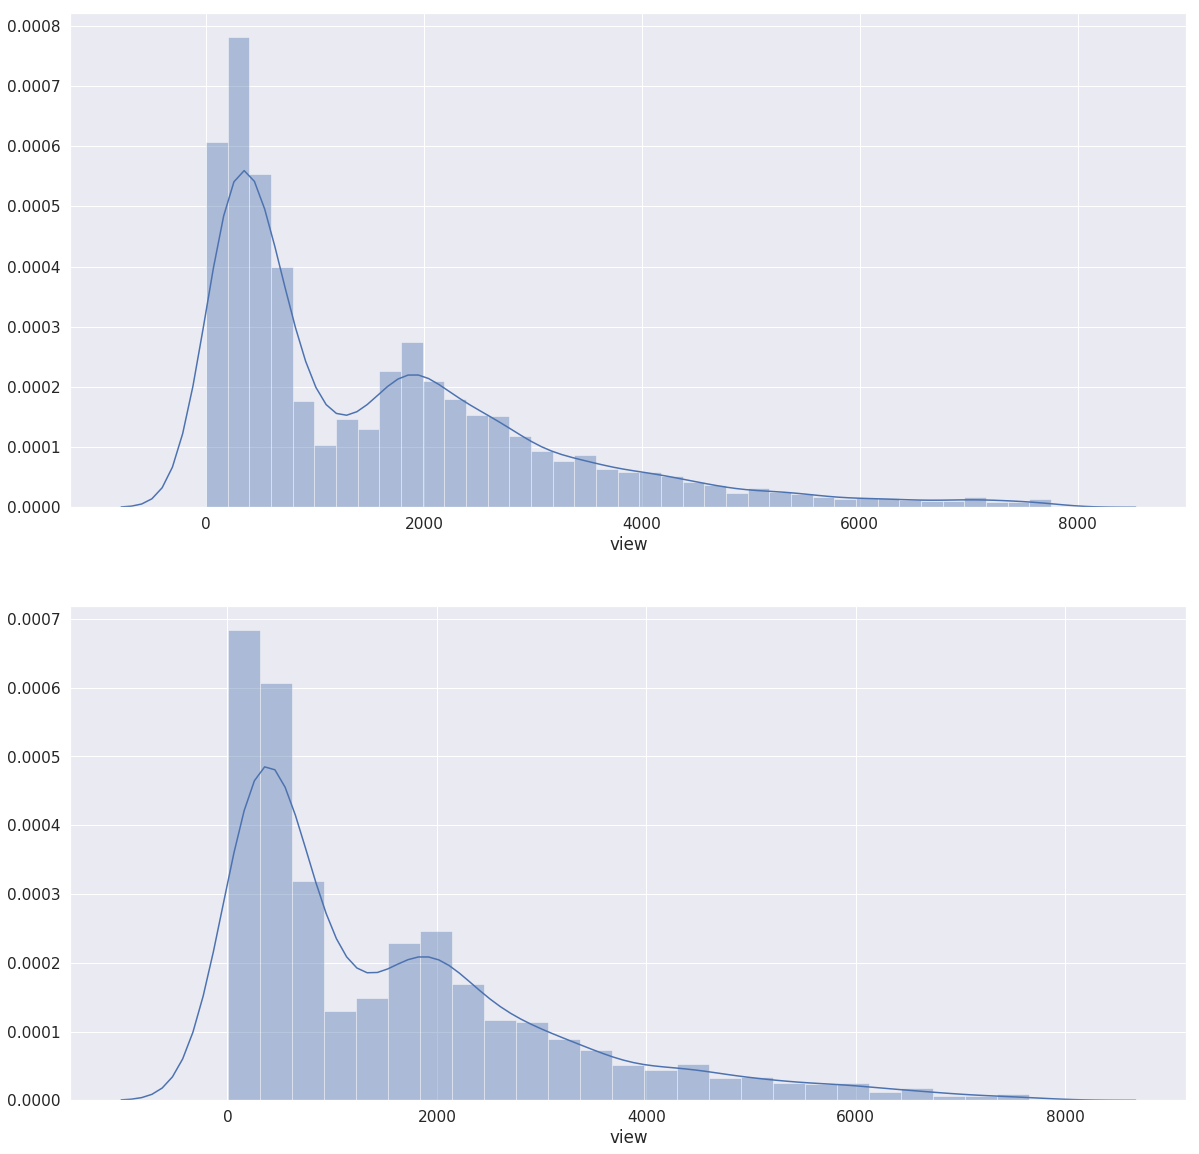

In [189]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_standard_train['view'],ax=axarr[0])
sns.distplot(input_standard_test['view'],ax=axarr[1])

## Bag of word feature

In [34]:
inputText_train = []
for sent in input_standard_train['token']:
    inputText_train.append(sent.split(','))

In [35]:
inputText_test = []
for sent in input_standard_test['token']:
    inputText_test.append(sent.split(','))

In [36]:
np.log(input_standard_train['view']).describe()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    7724.000000
mean    -inf        
std     NaN         
min     -inf        
25%      5.880533   
50%      6.898714   
75%      7.770856   
max      8.956093   
Name: view, dtype: float64

In [37]:
# MINVIEW

In [38]:
# f, axarr = plt.subplots(2, figsize=(20,20))
# sns.distplot(inputLabel_train,ax=axarr[0])
# sns.distplot(inputLabel_test,ax=axarr[1])

In [39]:
# print(len(inputText_train),len(inputLabel_train))

In [40]:
# print(len(inputText_test),len(inputLabel_test))

In [41]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//10]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [42]:
len(word_count)

1144

In [43]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [44]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [45]:
len(all_token)

1146

In [46]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [47]:
input_data_train = np.asarray(input_standard_train['token'].str.split(','))
input_data_test = np.asarray(input_standard_test['token'].str.split(','))

In [48]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [49]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

In [50]:
x_f1_train.shape

(7724, 1146)

## Numerical feature

In [171]:
input_standard.columns[50:]

Index(['is_World Cup 2018 Analysis', 'is_Eat & Drink', 'is_Beauty',
       'is_Lifestyle', 'is_Politics', 'is_nan', 'is_ศิโรตม์ คล้ามไพบูลย์',
       'is_TV & Entertainment', 'is_WORLD CUP 2018', 'is_World',
       'is_Art & Design', 'is_Environment', 'is_China', 'is_Tech',
       'is_โตมร ศุขปรีชา', 'is_POP', 'is_King Rama9 2018', 'is_Oscars 2018',
       'is_เคท ครั้งพิบูลย์', 'is_Book', 'is_Travel', 'is_Film',
       'is_Sex & Relationships', 'is_เมธา พันธุ์วราทร',
       'is_World Cup 2018 Fixtures', 'is_Music', 'is_On this day',
       'is_Entertainment', 'is_Event', 'is_อาจวรงค์ จันทมาศ', 'is_Culture',
       'tag_pop_sum', 'tag_pop_mean', 'num_date', 'num_email', 'num_law',
       'num_len', 'num_location', 'num_money', 'num_organization',
       'num_percent', 'num_person', 'num_phone', 'num_time', 'num_url',
       'num_person_2', 'num_pos', 'num_neg', 'sim_top', 'sim_worst',
       'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_wors

In [190]:
numerical_feature = [
       'numTag', 'numToken', 'numChar','timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst','Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4',
       'Topic 5', 'Topic 6', 'Topic 7']



In [191]:
len(numerical_feature)

54

In [192]:
cs = MinMaxScaler()

In [193]:
trainContinuous = cs.fit_transform(input_standard_train[numerical_feature])
testContinuous = cs.fit_transform(input_standard_test[numerical_feature])

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [194]:
trainContinuous.shape

(7724, 54)

## Categorial feature

In [195]:
categorial_feature = ['DOW',
        'month', 'year',
        'is_Now & Next 2018', 'is_Business', 'is_Living',
       'is_Special Report', 'is_Special Story', 'is_Now & Next 2019',
       'is_ณัฐพงศ์ ดวงแก้ว', 'is_Sport', 'is_Harry And Meghan',
       'is_สโรจ เลาหศิริ', 'is_LGBTQ', 'is_World Cup 2018 Features',
       'is_Wellness', 'is_Grooming', 'is_Guest', 'is_King Rama 9', 'is_News',
       'is_Science', 'is_ธิดากานต์ รุจิพัฒนกุล', 'is_Thailand',
       'is_Editor’s Desk', 'is_โสภณ ศุภมั่งมี', 'is_Fashion','is_World Cup 2018 Analysis', 'is_Eat & Drink', 'is_Beauty',
       'is_Lifestyle', 'is_Politics', 'is_nan', 'is_ศิโรตม์ คล้ามไพบูลย์',
       'is_TV & Entertainment', 'is_WORLD CUP 2018', 'is_World',
       'is_Art & Design', 'is_Environment', 'is_China', 'is_Tech',
       'is_โตมร ศุขปรีชา', 'is_POP', 'is_King Rama9 2018', 'is_Oscars 2018',
       'is_เคท ครั้งพิบูลย์', 'is_Book', 'is_Travel', 'is_Film',
       'is_Sex & Relationships', 'is_เมธา พันธุ์วราทร',
       'is_World Cup 2018 Fixtures', 'is_Music', 'is_On this day',
       'is_Entertainment', 'is_Event', 'is_อาจวรงค์ จันทมาศ', 'is_Culture',
       ]

# categorial_feature = ['DOW', 'hour',
#         'month', 'year',
#         'is_environment',
#        'is_crime', 'is_social',
#          'is_science', 
#         'is_Mon', 'is_Tue', 'is_Wed',
#        'is_Thu', 'is_Fri',   'is_weekend', 'is_pos',
#        'is_neg']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','is_inter',
#                      'is_region','is_Wed','is_asian','is_south']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','hour','month']

In [196]:
len(categorial_feature)

57

In [197]:
lb = preprocessing.LabelBinarizer()

In [198]:
# zipBinarizer = lb.fit(input_standard["DOW"])
# trainCategorical_dow = zipBinarizer.transform(input_standard_train["DOW"])
# testCategorical_dow = zipBinarizer.transform(input_standard_test["DOW"])
# zipBinarizer = lb.fit(input_standard["month"])
# trainCategorical_month = zipBinarizer.transform(input_standard_train["month"])
# testCategorical_month = zipBinarizer.transform(input_standard_test["month"])
# zipBinarizer = lb.fit(input_standard["year"])
# trainCategorical_year = zipBinarizer.transform(input_standard_train["year"])
# testCategorical_year = zipBinarizer.transform(input_standard_test["year"])
# zipBinarizer = lb.fit(input_standard["hour"])
# trainCategorical_hour = zipBinarizer.transform(input_standard_train["hour"])
# testCategorical_hour = zipBinarizer.transform(input_standard_test["hour"])
# zipBinarizer = lb.fit(input_standard["category"])
# trainCategorical_category = zipBinarizer.transform(input_standard_train["category"])
# testCategorical_category = zipBinarizer.transform(input_standard_test["category"])
# zipBinarizer = lb.fit(input_standard["sentiment"])
# trainCategorical_sentiment = zipBinarizer.transform(input_standard_train["sentiment"])
# testCategorical_sentiment = zipBinarizer.transform(input_standard_test["sentiment"])

## Concat feature

In [199]:
tmp_train = np.hstack([x_f1_train, trainContinuous])
tmp_test = np.hstack([ x_f1_test, testContinuous])
print(tmp_train.shape)

for f in categorial_feature:
    zipBinarizer = lb.fit(input_standard[f])
    trainCategorical = zipBinarizer.transform(input_standard_train[f])
    testCategorical = zipBinarizer.transform(input_standard_test[f])
    tmp_train = np.hstack([tmp_train,trainCategorical])
    tmp_test = np.hstack([tmp_test,testCategorical])

(7724, 1200)


In [200]:
x_train = tmp_train
x_test = tmp_test

In [201]:
x_train.shape

(7724, 1276)

In [202]:
# x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
#                      trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
# x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
#                     testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [203]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [204]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## create y

In [205]:
view_bound = list(input_standard_train.groupby('class')['view'].describe()['max'])

In [206]:
view_bound

[257.0, 7755.0, 470.0, 1073.0, 2246.0, 4285.0]

In [207]:
view_bound = sorted(view_bound)

In [208]:
view_bound

[257.0, 470.0, 1073.0, 2246.0, 4285.0, 7755.0]

In [209]:
inputLabel_train_class = []
for view in input_standard_train['view']:
    if view <= view_bound[0] :
        inputLabel_train_class.append(0)
    elif view <= view_bound[1] : 
        inputLabel_train_class.append(1)
    elif view <= view_bound[2] : 
        inputLabel_train_class.append(2)
    elif view <= view_bound[3] : 
        inputLabel_train_class.append(3)
    elif view <= view_bound[4] : 
        inputLabel_train_class.append(4)
#     elif view <= view_bound[5] : 
#         inputLabel_train_class.append(5)
#     elif view <= view_bound[6] : 
#         inputLabel_train_class.append(6)
#     elif view <= view_bound[7] : 
#         inputLabel_train_class.append(7)
    else:
        inputLabel_train_class.append(5)

In [210]:
inputLabel_test_class = []
for view in input_standard_test['view']:
    if view <= view_bound[0] :
        inputLabel_test_class.append(0)
    elif view <= view_bound[1] : 
        inputLabel_test_class.append(1)
    elif view <= view_bound[2] : 
        inputLabel_test_class.append(2)
    elif view <= view_bound[3] : 
        inputLabel_test_class.append(3)
    elif view <= view_bound[4] : 
        inputLabel_test_class.append(4)
#     elif view <= view_bound[5] : 
#         inputLabel_test_class.append(5)
#     elif view <= view_bound[6] : 
#         inputLabel_test_class.append(6)
#     elif view <= view_bound[7] : 
#         inputLabel_test_class.append(7)
    else:
        inputLabel_test_class.append(5)

In [211]:
y_train_class = inputLabel_train_class
y_train_class = np.asarray(y_train_class).reshape(-1,1)
y_test_class = inputLabel_test_class
y_test_class = np.asarray(y_test_class).reshape(-1,1)

In [212]:
y_train_class, y_val_class = train_test_split(y_train_class, test_size=0.2,random_state=100)

In [213]:
MAXVIEW_log = np.log(input_standard['view']).describe()['max']

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [214]:
inputLabel_train_view = []
for view in input_standard_train['view']:
    inputLabel_train_view.append(np.log(view+0.00001)/MAXVIEW_log)

In [215]:
inputLabel_test_view = []
for view in input_standard_test['view']:
    inputLabel_test_view.append(np.log(view+0.00001)/MAXVIEW_log)

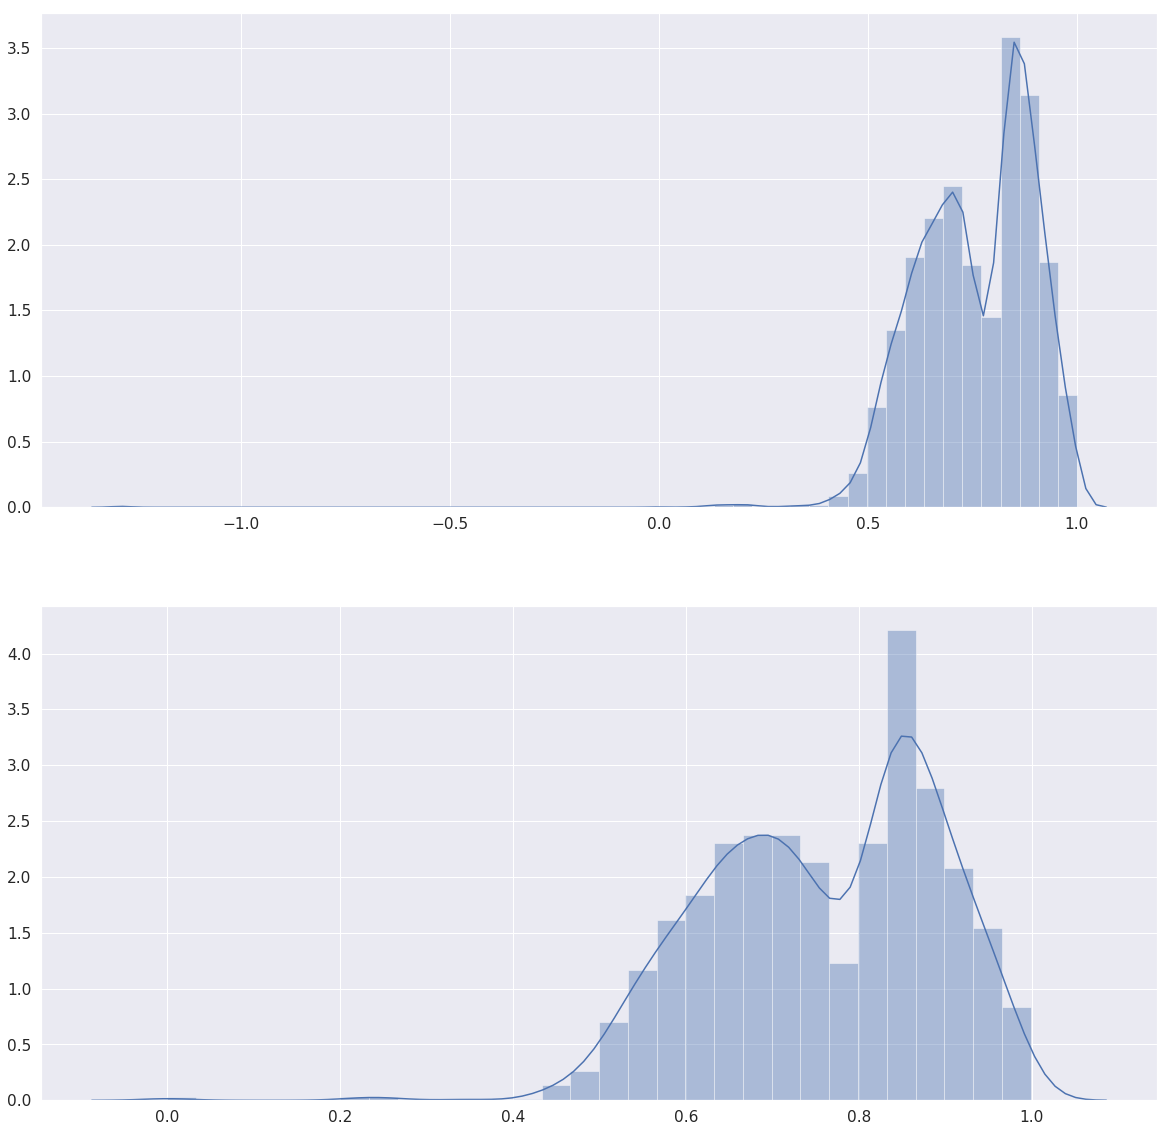

In [216]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(inputLabel_train_view,ax=axarr[0])
sns.distplot(inputLabel_test_view,ax=axarr[1])

In [217]:
y_train_view = inputLabel_train_view
y_train_view = np.asarray(y_train_view).reshape(-1,1)
y_test_view = inputLabel_test_view
y_test_view= np.asarray(y_test_view).reshape(-1,1)

In [218]:
y_train_view, y_val_view = train_test_split(y_train_view, test_size=0.2,random_state=100)

In [219]:
y_test_view.shape

(1932, 1)

## Prepare data for Keras

In [220]:
x_train, x_val = train_test_split(x_train, test_size=0.2,random_state=100)

In [221]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_val=keras.preprocessing.sequence.pad_sequences(x_val, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [222]:
x_train.shape

(6179, 1276)

In [223]:
print("train size",x_train.shape)
print("val size",x_val.shape)
print("test size",x_test.shape)

train size (6179, 1276)
val size (1545, 1276)
test size (1932, 1276)


In [224]:
# y_train = inputLabel_train
# y_train = np.asarray(y_train).reshape(-1,1)
# y_test = inputLabel_test
# y_test = np.asarray(y_test).reshape(-1,1)

In [225]:
y_train_class = np_utils.to_categorical(y_train_class)
y_val_class = np_utils.to_categorical(y_val_class)
y_test_class = np_utils.to_categorical(y_test_class)

In [226]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [227]:
print("train size",y_train_class.shape)
print("train size",y_val_class.shape)
print("test size",y_test_class.shape)
print("train size",y_train_view.shape)
print("train size",y_val_view.shape)
print("test size",y_test_view.shape)

train size (6179, 6)
train size (1545, 6)
test size (1932, 6)
train size (6179, 1)
train size (1545, 1)
test size (1932, 1)


## Create Model

In [228]:
# from sklearn.model_selection import KFold

In [229]:
# kfold = KFold(10, True, 1)

In [230]:
# def create_model():
# #     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
#     input1 = Input(shape=(x_train.shape[1],))
# #     x = LSTM(32)(input1)
# #     x = Dense(256, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(128, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(64, activation='relu')(x)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(32, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(16, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

# #     x = Dense(2048, activation='relu')(input1)
# #     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.3)(x)
    
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1,activation='linear')(x)
#     model = Model(inputs=input1, outputs=x)
#     adam  = Adam(lr=0.0001)
#     model.compile(optimizer=adam,  loss='mean_absolute_percentage_error')
    
#     return model


In [231]:
def create_model():
    input1 = Input(shape=(x_train.shape[1],))
#     x = Dense(2048, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='relu')(input1)
    x = Dropout(0.3)(x)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    class_out = Dense(6,activation='softmax')(x)
    
    model = Model(inputs=input1, outputs=class_out)
    adam  = Adam(lr=0.001)
    model.compile(optimizer=Adam(),
            loss='categorical_crossentropy',
            metrics=['acc'])
    
    return model


In [232]:
def create_model_2():
    input1 = Input(shape=(x_train.shape[1]+6,))
    x = Dense(256, activation='relu')(input1)
    x = Dropout(0.3)(x)
#     x = Dense(128, activation='elu')(x)
#     x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = Dense(32, activation='elu')(x)
#     x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
    view_out = Dense(1,activation='linear')(x)
    
    model = Model(inputs=input1, outputs=view_out)
    adam  = Adam(lr=0.001)
    model.compile(optimizer=adam,  loss='mse') 
    return model


In [233]:
model_class = create_model()
print(model_class.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1276)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               326912    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
__________

In [234]:
model_view = create_model_2()
print(model_view.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 1282)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               328448    
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
__________

In [235]:
# weight_path='./model_ver2_1.h5'
# callbacks_list = [
#         ModelCheckpoint(
#             weight_path,
#             save_best_only=True,
#             save_weights_only=True,
#             monitor='val_loss',
#             mode='min',
#             verbose=1
#         )
# ]

In [236]:
weight_path_class='./model_class_standard_1.h5'
callbacks_list_class = [
        ModelCheckpoint(
            weight_path_class,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_acc',
            mode='max',
            verbose=1
        )
]
weight_path_view='./model_view_standard_2.h5'
callbacks_list_view = [
        ModelCheckpoint(
            weight_path_view,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
]

In [237]:
model_class.fit(x_train,y_train_class, 
          batch_size=32 ,epochs=30, verbose=1, validation_data=[x_val,y_val_class],callbacks=callbacks_list_class)

Train on 6179 samples, validate on 1545 samples
Epoch 1/30
6179/6179 [==============================] - 2s 333us/step - loss: 1.7542 - acc: 0.2159 - val_loss: 1.7164 - val_acc: 0.2408

Epoch 00001: val_acc improved from -inf to 0.24078, saving model to ./model_class_standard_1.h5
Epoch 2/30
6179/6179 [==============================] - 1s 196us/step - loss: 1.6806 - acc: 0.2844 - val_loss: 1.6498 - val_acc: 0.2945

Epoch 00002: val_acc improved from 0.24078 to 0.29450, saving model to ./model_class_standard_1.h5
Epoch 3/30
6179/6179 [==============================] - 1s 197us/step - loss: 1.5631 - acc: 0.3588 - val_loss: 1.6356 - val_acc: 0.3003

Epoch 00003: val_acc improved from 0.29450 to 0.30032, saving model to ./model_class_standard_1.h5
Epoch 4/30
6179/6179 [==============================] - 1s 202us/step - loss: 1.4132 - acc: 0.4337 - val_loss: 1.6538 - val_acc: 0.3210

Epoch 00004: val_acc improved from 0.30032 to 0.32104, saving model to ./model_class_standard_1.h5
Epoch 5/30


In [238]:
weight_model_class ='./model_class_standard_1.h5'
model_class = create_model()
model_class.load_weights(weight_model_class)
# model._make_predict_functi"on()
model_class.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 1276)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               326912    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_31 (Dropout)         (None, 32)                0         
__________

In [248]:
x_pred_class_train = model_class.predict(x_train)
x_pred_class_val = model_class.predict(x_val)

In [249]:
x_train_class = np.concatenate((x_train, x_pred_class_train), axis=1)
x_val_class = np.concatenate((x_val, x_pred_class_val), axis=1)

In [250]:
model_view.fit(x_train_class, y_train_view, 
          batch_size=8 ,epochs=50, verbose=1, validation_data=[x_val_class,y_val_view],callbacks=callbacks_list_view)

Train on 6179 samples, validate on 1545 samples
Epoch 1/50
6179/6179 [==============================] - 5s 766us/step - loss: 0.0534 - val_loss: 0.0211

Epoch 00001: val_loss improved from inf to 0.02106, saving model to ./model_view_standard_2.h5
Epoch 2/50
6179/6179 [==============================] - 4s 637us/step - loss: 0.0196 - val_loss: 0.0195

Epoch 00002: val_loss improved from 0.02106 to 0.01950, saving model to ./model_view_standard_2.h5
Epoch 3/50
6179/6179 [==============================] - 4s 654us/step - loss: 0.0117 - val_loss: 0.0213

Epoch 00003: val_loss did not improve from 0.01950
Epoch 4/50
6179/6179 [==============================] - 4s 640us/step - loss: 0.0082 - val_loss: 0.0193

Epoch 00004: val_loss improved from 0.01950 to 0.01930, saving model to ./model_view_standard_2.h5
Epoch 5/50
6179/6179 [==============================] - 4s 639us/step - loss: 0.0060 - val_loss: 0.0185

Epoch 00005: val_loss improved from 0.01930 to 0.01846, saving model to ./model_vie

In [251]:
weight_model_view ='./model_view_standard_2.h5'
model_view = create_model_2()
model_view.load_weights(weight_model_view)
# model._make_predict_functi"on()
model_view.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 1282)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               328448    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_35 (Dropout)         (None, 16)                0         
__________

## Evaluate Model

In [239]:
y_pred_class = model_class.predict(x_test)

In [240]:
def evaluate_class(y_pred, y_test):
    acc = 0
    pred = list()
    true = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
        true.append(np.argmax(y_test[i]))
    return f1_score(true, pred, average='micro'),pred,true  

In [241]:
f1,pred,true = evaluate_class(y_pred_class,y_test_class)

In [242]:
f1

0.30952380952380953

In [243]:
from sklearn.metrics import accuracy_score

In [244]:
accuracy_score(true, pred)

0.30952380952380953

In [245]:
def evaluate_heat(y_pred,y_test):
    correct = 0
    wrong = 0
    count = [0,0,0,0,0,0,0,0]
    heatmap =[[0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0]]
    true_pred = [0]*8
    for i in range(len(y_pred)):
        p_level_pred = np.argmax(y_pred[i])
        p_level_test = np.argmax(y_test[i])
        count[p_level_pred]+=1
        heatmap[p_level_test][p_level_pred]+=1
        if(p_level_pred == p_level_test):
            true_pred[p_level_pred] += 1
            correct += 1
        else:
            wrong +=1
    print(np.asarray(heatmap))
    heatmap = [[line[i]/np.sum(line) for i in range(len(line))] for line in heatmap]
    print(count)
    return correct/(correct+wrong), heatmap

In [246]:
score, heatmap = evaluate_heat(y_pred_class, y_test_class)
print(score)
# print(heatmap)

[[148  59  50  35  24   3   0   0]
 [ 98  54  77  29  42   2   0   0]
 [ 81  61 108  57  70   3   0   0]
 [ 57  30  77 182  87   8   0   0]
 [ 44  27  53 117  95   7   0   0]
 [ 20   8  27  36  45  11   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[448, 239, 392, 456, 363, 34, 0, 0]
0.30952380952380953


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


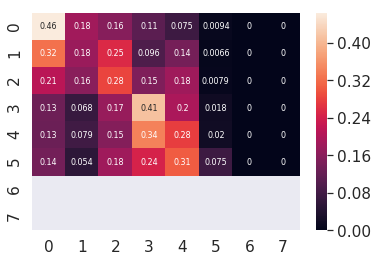

In [247]:
df_cm = pd.DataFrame(heatmap, range(8),
                  range(8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

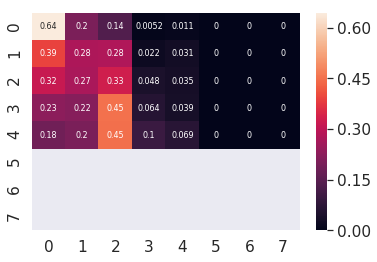

In [955]:
df_cm = pd.DataFrame(heatmap, range(8),
                  range(8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

In [252]:
x_test_view = np.concatenate((x_test, y_pred_class), axis=1)

In [253]:
y_pred_view = model_view.predict(x_test_view)

In [254]:
y_pred_view.shape

(1932, 1)

In [255]:
y_test_view.shape

(1932, 1)

In [256]:
mse = mean_squared_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 2155064.0470837927
rmse : 1468.013639951548
mae : 990.1807995455166


In [257]:
x_train_class.shape

(6179, 1282)

In [258]:
y_train_view.shape

(6179, 1)

In [259]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model_view.predict(x_train_class),y_train_view )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [260]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

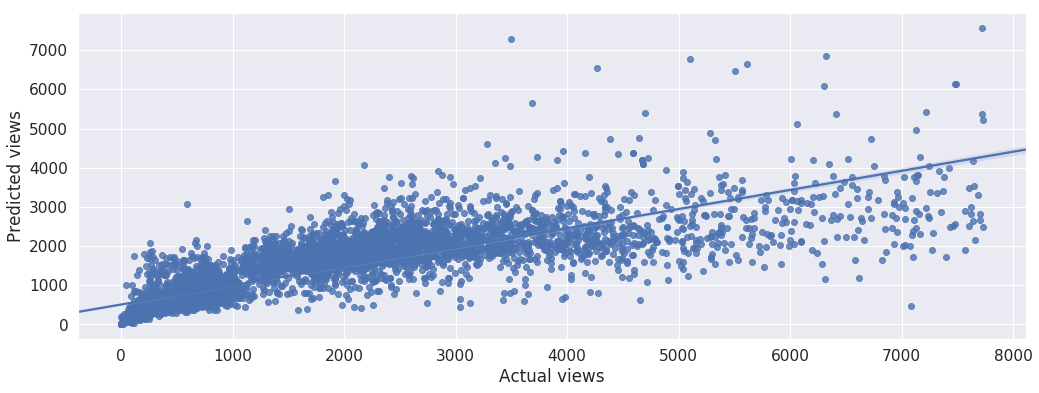

In [261]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


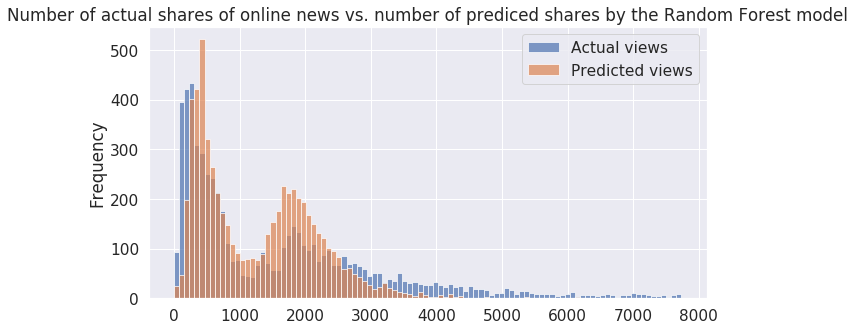

In [262]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [263]:
x_test_view.shape

(1932, 1282)

In [264]:
y_test_view.shape

(1932, 1)

In [265]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model_view.predict(x_test_view),y_test_view )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [266]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

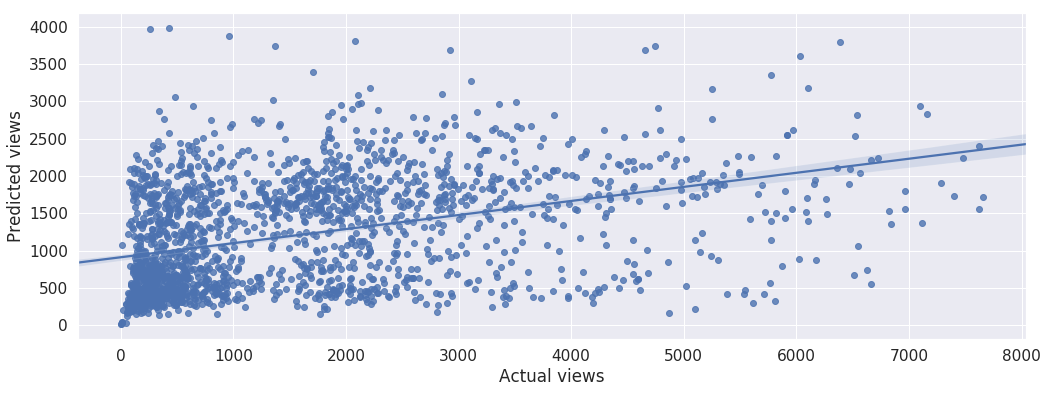

In [267]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

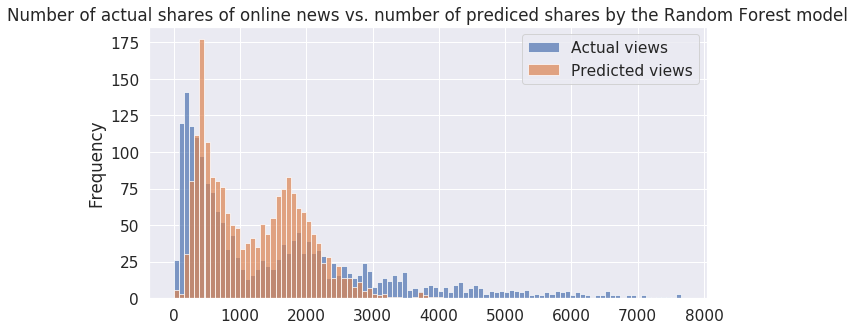

In [268]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

## compared to baseline model

In [241]:
from sklearn.linear_model import LinearRegression

In [156]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
view_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

1114840569306645.4

In [158]:
lin_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
print(lin_mae)

30916763289216.324


In [159]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [160]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [161]:
view_predictions = tree_reg.predict(x_test)
tree_mse = mean_squared_error( np.exp(y_test_view*MAXVIEW_log), view_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1900.871664874802

In [162]:
tree_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
print(tree_mae)

1257.5919599723948


In [242]:
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [243]:
share_predictions = forest_reg.predict(x_test)
forest_mse = mean_squared_error(np.exp(y_test_view*MAXVIEW_log), share_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #with outliers:5282.35

1478.592622547045

In [244]:
forest_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), share_predictions)
print(forest_mae) #with outliers:1424

1043.4291464556838


In [245]:
df_someXdata = pd.DataFrame(forest_reg.predict(x_test),np.exp(y_test_view*MAXVIEW_log) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,1870.00001,1492.10001
1,2607.00001,587.10001
2,4294.00001,3048.60001
3,351.00001,416.20001
4,275.00001,1871.30001


AttributeError: module 'seaborn' has no attribute 'plt'

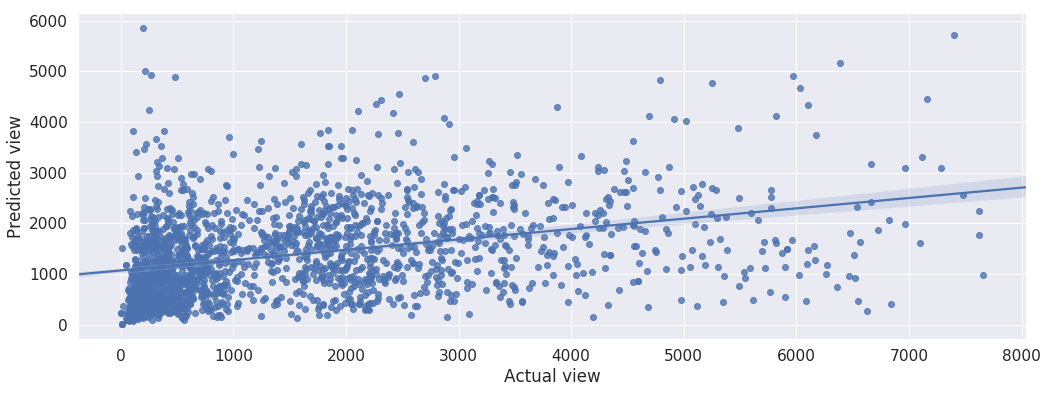

In [246]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

In [ ]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()